# ¿Que es data science?

<img src="assets/data-science.JPG" height="400px"/>

In [2]:
import pandas as pd
#para hacer consultas sql diréctamente con dataframes
from pandasql import sqldf
#Para crear sentencias sql coo tablas o columnas
from sqlalchemy import create_engine
#Para hacer gráficas
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import display

df_players=pd.read_csv("assets/datasets/players.csv")
df_clubs=pd.read_csv("assets/datasets/clubs.csv")
#Precio de mercado de los jugadores
df_validations=pd.read_csv("assets/datasets/player_valuations.csv")

#Función lambda que hace escribir funciones sql mucho más facil
pysqldf = lambda q: sqldf(q, globals())

# Recolección de datos

<img src="assets/diagram.svg" height="400px"/>

# Limpieza y preparación de datos



## Visualizar total filas y columnas, nombre columna, valores no nulos y tipo de datos

In [3]:
#shape nos muestra las filas y columnas que tiene el dataframe
df_players.shape
#Head nos muestra las primeras 5 milas y las columnas del dataframe
#df_players.head(5)
#info nos muestra información de las columnas, nos dice los valores no nulos que tiene y el tipo de dato
df_players.info()
#df_players.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404 entries, 0 to 32403
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32404 non-null  int64  
 1   first_name                            30346 non-null  object 
 2   last_name                             32404 non-null  object 
 3   name                                  32404 non-null  object 
 4   last_season                           32404 non-null  int64  
 5   current_club_id                       32404 non-null  int64  
 6   player_code                           32404 non-null  object 
 7   country_of_birth                      29596 non-null  object 
 8   city_of_birth                         29938 non-null  object 
 9   country_of_citizenship                32024 non-null  object 
 10  date_of_birth                         32357 non-null  object 
 11  sub_position   

# Limpieza y preparación de datos

## Modificar nombes de columnas

### Players

In [4]:
# Nostros queremos 2 tablas, la de players y la de clubs
df_players.head()
"""
    'player_id', 'first_name', 'last_name', 'name', 'last_season',
    'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
    'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
    'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
    'image_url', 'url', 'current_club_domestic_competition_id',
    'current_club_name', 'market_value_in_eur',
    'highest_market_value_in_eur'],
    dtype='object'
"""
"""
new_names_columns_players=["player_id","nombre","apellido", "nombre_completo","ultima_temporada", 
    "actual_club_id", "codigo_player", "pais_de_nacimiento", "ciudad_de_nacimiento", 
    "pais_de_ciudadania", "fecha_de_nacimiento","sub_posicón","posición",
    "pie","altura_en_centimetros","fecha_de_vencimiento_del_contrato", "nombre_del_agente","url_imagen",
    "url_player", "id_de_competición_nacional_del_club_actual", "nombre_del_club_actual","valor_de_mercado_en_euros","valor_de_mercado_más_alto_en_euros"]
df_players.columns=new_names_columns_players
df_players
"""

#otra forma para renombrar es con rename
df_players.rename(columns={"player_id":"player_id","first_name":"nombre","last_name":"apellido", "name":"nombre_completo","last_season":"ultima_temporada", 
    "current_club_id":"actual_club_id", "player_code":"codigo_player", "country_of_birth":"pais_de_nacimiento", "city_of_birth":"ciudad_de_nacimiento", 
    "country_of_citizenship":"pais_de_ciudadania", "date_of_birth":"fecha_de_nacimiento","sub_position":"sub_posición","position":"posición", 
    "foot":"pie","height_in_cm":"altura_en_centimetros","contract_expiration_date":"fecha_de_vencimiento_del_contrato", "agent_name":"nombre_del_agente","image_url":"url_imagen",
    "url":"url_player", "current_club_domestic_competition_id":"id_de_competición_nacional_del_club_actual", "current_club_name":"nombre_del_club_actual",
    "market_value_in_eur":"valor_de_mercado_en_euros","highest_market_value_in_eur":"valor_de_mercado_más_alto_en_euros"}, inplace=True)




### Clubs

In [5]:
df_clubs.head()
"""
club_id,	club_code,	name,	domestic_competition_id, total_market_value,	
squad_size,	average_age,	foreigners_number,	foreigners_percentage,	national_team_players,	
stadium_name,	stadium_seats,	net_transfer_record,   coach_name,	last_season,	
filename,   url
"""
"""
new_names_columns_clubs=["club_id","codigo_club","nombre", "competicion_id","valor_total_mercado",
                        "tamanio_plantilla", "edad_promedio", "numero_extranjeros", "porcentaje_extranjeros","jugadores_del_equipo_nacional",
                        "nombre_estadio", "capacidad_estadio", "registro_transferencias", "nombre_del_entrenador", "ultima_temporada",
                        "nombre_archivo" ,"url"]
df_clubs.columns=new_names_columns_clubs
"""
df_clubs.rename(columns={"club_id":"club_id","club_code":"codigo_club","name":"nombre", "domestic_competition_id":"competicion_id","total_market_value":"valor_total_mercado", 
    "squad_size":"tamanio_plantilla", "average_age":"edad_promedio", "foreigners_number":"numero_extranjeros", "foreigners_percentage":"porcentaje_extranjeros", 
    "national_team_players":"jugadores_del_equipo_nacional", "stadium_name":"nombre_estadio","stadium_seats":"capacidad_estadio","net_transfer_record":"registro_transferencias", 
    "coach_name":"nombre_del_entrenador","last_season":"ultima_temporada","filename":"nombre_archivo", "url":"url_club"}, inplace=True)
df_clubs
#otra forma de renombrar columnas es con rename


,club_id,codigo_club,nombre,competicion_id,valor_total_mercado,tamanio_plantilla,edad_promedio,numero_extranjeros,porcentaje_extranjeros,jugadores_del_equipo_nacional,nombre_estadio,capacidad_estadio,registro_transferencias,nombre_del_entrenador,ultima_temporada,nombre_archivo,url_club
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,26.2,16,51.6,7,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.2,19,73.1,19,Olimpico di Roma,73261,€-65.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.5,18,69.2,17,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,NaN,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,26,27.4,15,57.7,19,Gewiss Stadium,24950,+€18.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,NaN,28,25.4,6,21.4,1,Ukraina,28051,€-1.48m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,24,26.4,16,66.7,3,Estádio C. J. de Almeida Freitas,6150,+€2.10m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


## Quitar valores nulos en registros y columna

### Players

In [6]:
#Aquí nos dice (31709, 23). es decir, tenemos 31709 y 23 columnas
df_players.shape
#eliminamos los registros duplicados
df_players.drop_duplicates()
#Al pasarle el drop_duplicates se quedan en (32404, 23)
#df_players.shape
#Le decimos que queremos eliminar los registros que tenga duplicdos en la columna nombre_completo, mira como de verdad los quita poniendo nombre en lugar de nombre_completo
# df_players.drop_duplicates(subset='nombre_completo', keep='first', inplace=True)
#borrar valores nuelos de todos los registros que tenga un valor nulo en una de sus columnas, con axis=1 le decimos que al menos un valor nulo
#df_players_sin_nulos=df_players.dropna(axis=1)
df_players_sin_nulos=df_players
#En lugar de borrar todo el registro con algún nulo lo correcto es reemplazar el campo nulo con la media
df_players_sin_nulos.shape


(32404, 23)

### Clubs

In [7]:
#(439, 17)
df_clubs.shape
df_clubs.drop_duplicates()
#df_clubs.drop_duplicates(subset='club_id', keep='first', inplace=True)
df_clubs_without_nulls=df_clubs.dropna(axis=1)
df_clubs_without_nulls.shape

(439, 13)

## Convertir valores de texto a numericos

In [8]:
# Vemos el tipo de dato de la columna 'valor_de_mercado_en_euros'
df_players_sin_nulos["valor_de_mercado_en_euros"].dtypes

# Supongamos que tienes la columna 'valor_de_mercado_en_euros' con valores tipo string
df_players_sin_nulos["valor_de_mercado_en_euros"] = df_players["valor_de_mercado_en_euros"].replace({'€': '', 'M': 'e6', 'K': 'e3', ',': ''}, regex=True)

# Convertir a valores numéricos
df_players_sin_nulos["valor_de_mercado_en_euros"] = pd.to_numeric(df_players["valor_de_mercado_en_euros"], errors='coerce')

# Verifica los primeros valores para asegurarte de que la conversión fue correcta
print(df_players["valor_de_mercado_en_euros"].head())

#describe (que solo funciona con números) nos muestra una
df_players_sin_nulos["valor_de_mercado_en_euros"].describe()


0    1000000.0
1     750000.0
2    1000000.0
3     200000.0
4     100000.0
Name: valor_de_mercado_en_euros, dtype: float64


count    3.086900e+04
mean     1.604175e+06
std      6.315098e+06
min      1.000000e+04
25%      1.000000e+05
50%      2.500000e+05
75%      7.000000e+05
max      2.000000e+08
Name: valor_de_mercado_en_euros, dtype: float64

# Exploración de datos

## Graficar los procentajes con boxplot

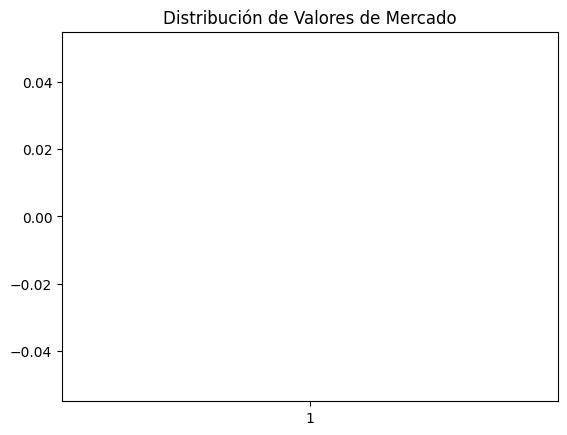

In [9]:
plt.boxplot(df_players_sin_nulos["valor_de_mercado_en_euros"])
plt.title("Distribución de Valores de Mercado")
#plt.xlabel("X")
#plt.ylabel("Y")
plt.show()

## Graficar los porcentajes con histograma

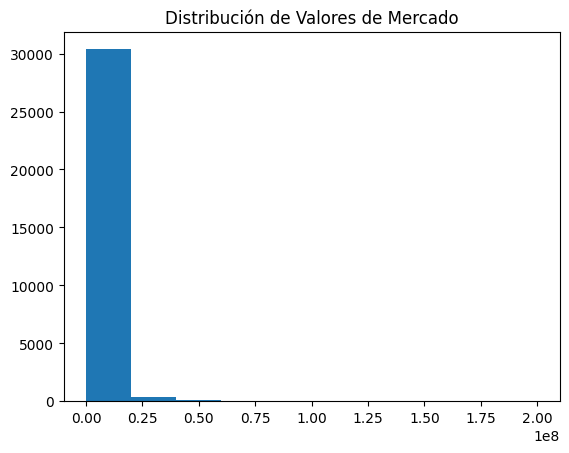

In [10]:
plt.hist(df_players_sin_nulos["valor_de_mercado_en_euros"])
plt.title("Distribución de Valores de Mercado")
#plt.xlabel("X")
#plt.ylabel("Y")
plt.show()

## Como todo se concentra en los 1 000 000 vamos a filtrar y mostrar solo los que tengas un valor menor de 1000000


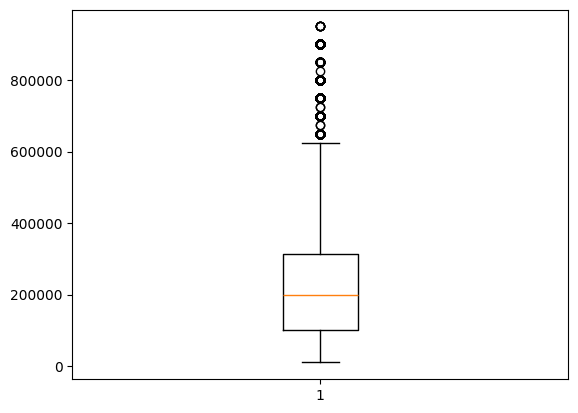

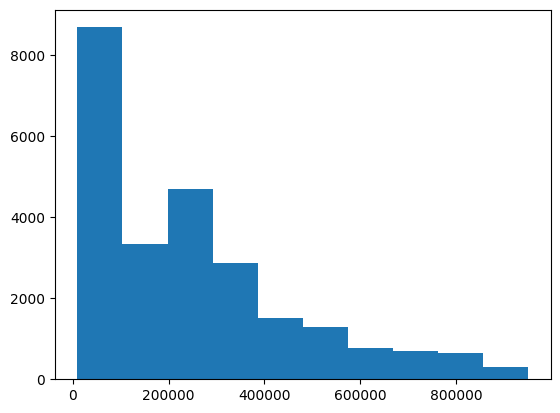

In [11]:
df_players_sin_nulos=df_players_sin_nulos[df_players_sin_nulos["valor_de_mercado_en_euros"] < 1000000]
plt.boxplot(df_players_sin_nulos["valor_de_mercado_en_euros"])
plt.show()
plt.hist(df_players_sin_nulos["valor_de_mercado_en_euros"])
plt.show()

## Reemplazar nulos con media columna

In [12]:
df_players_con_media=df_players_sin_nulos.fillna(df_players_sin_nulos["valor_de_mercado_en_euros"].mean())
df_players_con_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24755 entries, 1 to 32400
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   player_id                                   24755 non-null  int64  
 1   nombre                                      24755 non-null  object 
 2   apellido                                    24755 non-null  object 
 3   nombre_completo                             24755 non-null  object 
 4   ultima_temporada                            24755 non-null  int64  
 5   actual_club_id                              24755 non-null  int64  
 6   codigo_player                               24755 non-null  object 
 7   pais_de_nacimiento                          24755 non-null  object 
 8   ciudad_de_nacimiento                        24755 non-null  object 
 9   pais_de_ciudadania                          24755 non-null  object 
 10  fecha_de_nacimi

## Eliminar una columna

In [13]:
df_players_con_media=df_players_con_media.drop("url_imagen", axis=1)
df_players_con_media

,player_id,nombre,apellido,nombre_completo,ultima_temporada,actual_club_id,codigo_player,pais_de_nacimiento,ciudad_de_nacimiento,pais_de_ciudadania,...,posición,pie,altura_en_centimetros,fecha_de_vencimiento_del_contrato,nombre_del_agente,url_player,id_de_competición_nacional_del_club_actual,nombre_del_club_actual,valor_de_mercado_en_euros,valor_de_mercado_más_alto_en_euros
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,Goalkeeper,left,190.000000,244210.866492,Neubauer 13 GmbH,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
3,77,244210.866492,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,Defender,244210.866492,244210.866492,244210.866492,244210.866492,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,Goalkeeper,right,194.000000,244210.866492,IFM,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
5,109,244210.866492,Dedê,Dedê,2013,825,dede,Brazil,Belo Horizonte,Brazil,...,Defender,244210.866492,244210.866492,244210.866492,Football Concept,https://www.transfermarkt.co.uk/dede/profil/sp...,TR1,Eskisehirspor,400000.0,9500000.0
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,...,Midfield,both,179.000000,244210.866492,244210.866492,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32394,1294048,Alex,Marques,Alex Marques,2024,2503,alex-marques,Portugal,Matosinhos,Portugal,...,Defender,right,186.000000,2026-06-30 00:00:00,Livesoccer,https://www.transfermarkt.co.uk/alex-marques/p...,PO1,Boavista Futebol Clube,100000.0,100000.0
32395,1294049,Tomás,Silva,Tomás Silva,2024,2503,tomas-silva,Portugal,Porto,Portugal,...,Defender,left,175.000000,2026-06-30 00:00:00,TGC,https://www.transfermarkt.co.uk/tomas-silva/pr...,PO1,Boavista Futebol Clube,100000.0,100000.0
32396,1294052,João,Barros,João Barros,2024,2503,joao-barros,Portugal,Porto,Portugal,...,Attack,244210.866492,244210.866492,2026-06-30 00:00:00,AGREF International,https://www.transfermarkt.co.uk/joao-barros/pr...,PO1,Boavista Futebol Clube,150000.0,150000.0
32399,1302421,244210.866492,João Neto,João Neto,2024,6992,joao-neto,244210.866492,244210.866492,Brazil,...,Attack,right,178.000000,244210.866492,ADRIANO SPORTS,https://www.transfermarkt.co.uk/joao-neto/prof...,UKR1,ZAO FK Chornomorets Odessa,100000.0,100000.0


## Crear otros dataframes con datos agrupados de dataframes

In [14]:
df_player_with_club_id=df_players_con_media.groupby("nombre_completo")['actual_club_id'].agg("first").reset_index()
df_player_with_club_id

,nombre_completo,actual_club_id
0,A.J. Soares,678
1,AJ Leitch-Smith,511
2,Aaron Appindangoyé,2381
3,Aaron Bastiaans,1426
4,Aaron Chapman,987
...,...,...
24347,İzzet Topatar,924
24348,İzzet Çelik,3840
24349,Şamil Öztürk,3205
24350,Şener Özbayraklı,6890


## Uniendo 2 dataframes con merge

In [15]:
df_player_clubs=df_players.merge(df_clubs, left_on="actual_club_id", right_on="club_id")
df_player_clubs

,player_id,nombre_x,apellido,nombre_completo,ultima_temporada_x,actual_club_id,codigo_player,pais_de_nacimiento,ciudad_de_nacimiento,pais_de_ciudadania,...,numero_extranjeros,porcentaje_extranjeros,jugadores_del_equipo_nacional,nombre_estadio,capacidad_estadio,registro_transferencias,nombre_del_entrenador,ultima_temporada_y,nombre_archivo,url_club
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,21,67.7,11,Olimpico di Roma,73261,€-8.95m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/lazio-rom/star...
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,11,45.8,16,SIGNAL IDUNA PARK,81365,€-46.40m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/borussia-dortm...
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,23,79.3,11,Toumba Stadium,28703,+€6.35m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/paok-thessalon...
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,19,70.4,18,Allianz Stadium,41507,€-61.30m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/juventus-turin...
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,17,60.7,20,Allianz Arena,75000,€-67.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-bayern-munc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,1302421,NaN,João Neto,João Neto,2024,6992,joao-neto,NaN,NaN,Brazil,...,7,23.3,0,Stadion Chornomorets (2011),34164,+€1.03m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/chornomorets-o...
32400,1306131,Fábio,Sambú,Fábio Sambú,2024,2503,fabio-sambu,Portugal,Barreiro,Portugal,...,9,36.0,3,Estádio do Bessa Século XXI,28263,+€2.50m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/boavista-porto...
32401,1306851,Hakim,Sulemana,Hakim Sulemana,2024,5724,hakim-sulemana,Ghana,Techiman,Ghana,...,15,55.6,3,Cepheus Park Randers,10300,+€1.41m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/randers-fc/sta...
32402,1309504,Diallo,Sanoussi,Diallo Sanoussi,2024,2778,diallo-sanoussi,NaN,NaN,Cote d'Ivoire,...,12,46.2,3,Right to Dream Park,10300,+€52.83m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-nordsjaella...


## Exportar a csv

In [16]:
df_player_with_club_id.to_csv("player_with_club_id.csv")

# SQL en python

1.Consultas básicas
select * from dataFrame (en nuestro caso df_players_con_media)

In [17]:
q="SELECT valor_de_mercado_en_euros, nombre_completo, actual_club_id FROM df_players"
pysqldf(q)

,valor_de_mercado_en_euros,nombre_completo,actual_club_id
0,1000000.0,Miroslav Klose,398
1,750000.0,Roman Weidenfeller,16
2,1000000.0,Dimitar Berbatov,1091
3,200000.0,Lúcio,506
4,100000.0,Tom Starke,27
...,...,...,...
32399,100000.0,João Neto,6992
32400,100000.0,Fábio Sambú,2503
32401,NaN,Hakim Sulemana,5724
32402,NaN,Diallo Sanoussi,2778


# WHERE
tarea: Crear un dataframe de df_players_media que están evaluados por más de 1.000.000 € y que su origen sea brasil

In [18]:
q = """
select valor_de_mercado_en_euros, nombre_completo, actual_club_id from df_players
where valor_de_mercado_en_euros >= 1000000
order by valor_de_mercado_en_euros desc
limit 10
"""
#where ciudad_de_nacimiento = 'Brazil'
df_players_mas_caros = pysqldf(q)
df_players_mas_caros

,valor_de_mercado_en_euros,nombre_completo,actual_club_id
0,200000000.0,Erling Haaland,281
1,180000000.0,Kylian Mbappé,418
2,180000000.0,Vinicius Junior,418
3,180000000.0,Jude Bellingham,418
4,150000000.0,Phil Foden,281
5,140000000.0,Bukayo Saka,11
6,130000000.0,Rodri,281
7,130000000.0,Jamal Musiala,27
8,130000000.0,Florian Wirtz,15
9,120000000.0,Declan Rice,11


# Joins

Los joins:

<img src="assets/joins.JPG" height="400px"/>

Tarea: Crear una tabla que nos muestre el top 10 de jugadores mas caros mostrando el nombre del club

In [19]:
#inner join: https://www.w3schools.com/sql/sql_join_inner.asp
q="""
select df_players.nombre_completo as nombre_jugador,df_clubs.nombre as club
from df_players inner join df_clubs on df_players.actual_club_id = df_clubs.club_id
order by df_players.valor_de_mercado_en_euros desc
limit 11
"""
df_top_clubes = pysqldf(q)
df_top_clubes


,nombre_jugador,club
0,Erling Haaland,Manchester City Football Club
1,Kylian Mbappé,Real Madrid Club de Fútbol
2,Vinicius Junior,Real Madrid Club de Fútbol
3,Jude Bellingham,Real Madrid Club de Fútbol
4,Phil Foden,Manchester City Football Club
5,Bukayo Saka,Arsenal Football Club
6,Rodri,Manchester City Football Club
7,Jamal Musiala,FC Bayern München
8,Florian Wirtz,Bayer 04 Leverkusen Fußball
9,Declan Rice,Arsenal Football Club


# Creando la tabla con sqlalchemy

In [20]:
#Conectar a la base de datos SQLite
engine = create_engine('sqlite:///football-data.sqlite')
#Convertir el DataFrame en una tabla SQL
df_players.to_sql('players', con=engine, if_exists='replace', index=False)
df_clubs.to_sql('clubs', con=engine, if_exists='replace', index=False)


439